<a href="https://www.kaggle.com/code/iqmansingh/icr-optuna-xgb-lgbm-rf-ensemble-eda?scriptVersionId=136131230" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="display:fill;
           background-color:#FCBAD3;
           font-size:110%;
           font-family:'Garamond';
           letter-spacing:0.5px;border-bottom: 5px solid black;">

<img src="https://raw.githubusercontent.com/IqmanS/Machine-Learning-Notebooks/main/icr_age_related_conditions/icr-banner.jpg">
<H1 style="padding: 20px;color:black;font-weight:700;">🩺 ICR - Identifying Age-Related Conditions</H1>
</div>


In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import random
import warnings
warnings.filterwarnings("ignore")

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# plt.style.use('dark_background')
sns.set_style("dark")

---
# Importing Dataset

In [2]:
train_data = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/train.csv",index_col="Id")
test_data = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/test.csv",index_col="Id")
train_data.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 000ff2bfdfe9 to ffcca4ded3bb
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      557 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      615 non-null    float64
 16  CC      614 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    

In [4]:
meanTrain = train_data.mean()
meanTest = test_data.mean()

for i in train_data.columns:
    if i!="EJ":
        train_data[i].replace(to_replace=np.NaN,value=meanTrain[i],inplace=True)
        
for i in test_data.columns:
    if i!="EJ":
        test_data[i].replace(to_replace=np.NaN,value=meanTest[i],inplace=True)
    else:
        test_data[i].replace(to_replace=np.NaN,value=1,inplace=True)
        
max(train_data.isnull().sum())

0

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

train_data["EJ"] = encoder.fit_transform(train_data["EJ"])
test_data["EJ"] = encoder.transform(test_data["EJ"])

In [6]:
train_data.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.486922,50.181948,1.303244,9.991907,144.181524,19352.959387,9.864239,36.266251,10.318624,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124414,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.036891,1.131000,0.257374,18.771436,72.611063,7838.273610,30.608946,41.007968,0.339429,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.237329,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [7]:
def removeOutliers(col):
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3-Q1
    lowerLimit = Q1-1.5*IQR
    upperLimit = Q3+1.5*IQR
    
    mean = train_data[((train_data[col] >= lowerLimit) | (train_data[col] <= upperLimit))][col].mean()
    train_data.loc[((train_data[col] < lowerLimit) | (train_data[col] > upperLimit)), col] = mean

In [8]:
# for col in train_data.select_dtypes("float64").columns:
#     removeOutliers(col)

---
# EDA

In [9]:
colsFloat = train_data.select_dtypes("float64").columns
colsInt = train_data.select_dtypes("int64").columns

In [10]:
fig, axes = plt.subplots(19,3,figsize=(15, 60))

for i in range(len(colsFloat)):
    plt.subplot(19,3,i+1)
    sns.histplot(train_data,x=colsFloat[i],hue="Class",bins=40,kde=True,palette="flare");
    plt.gca().set_title(colsFloat[i])
    
for j in range(len(colsInt)):
    plt.subplot(19,3,i+j+2)
    sns.countplot(train_data,x=colsInt[j],palette="flare");
    plt.gca().set_title(colsInt[j])
    
fig.tight_layout()
plt.show()

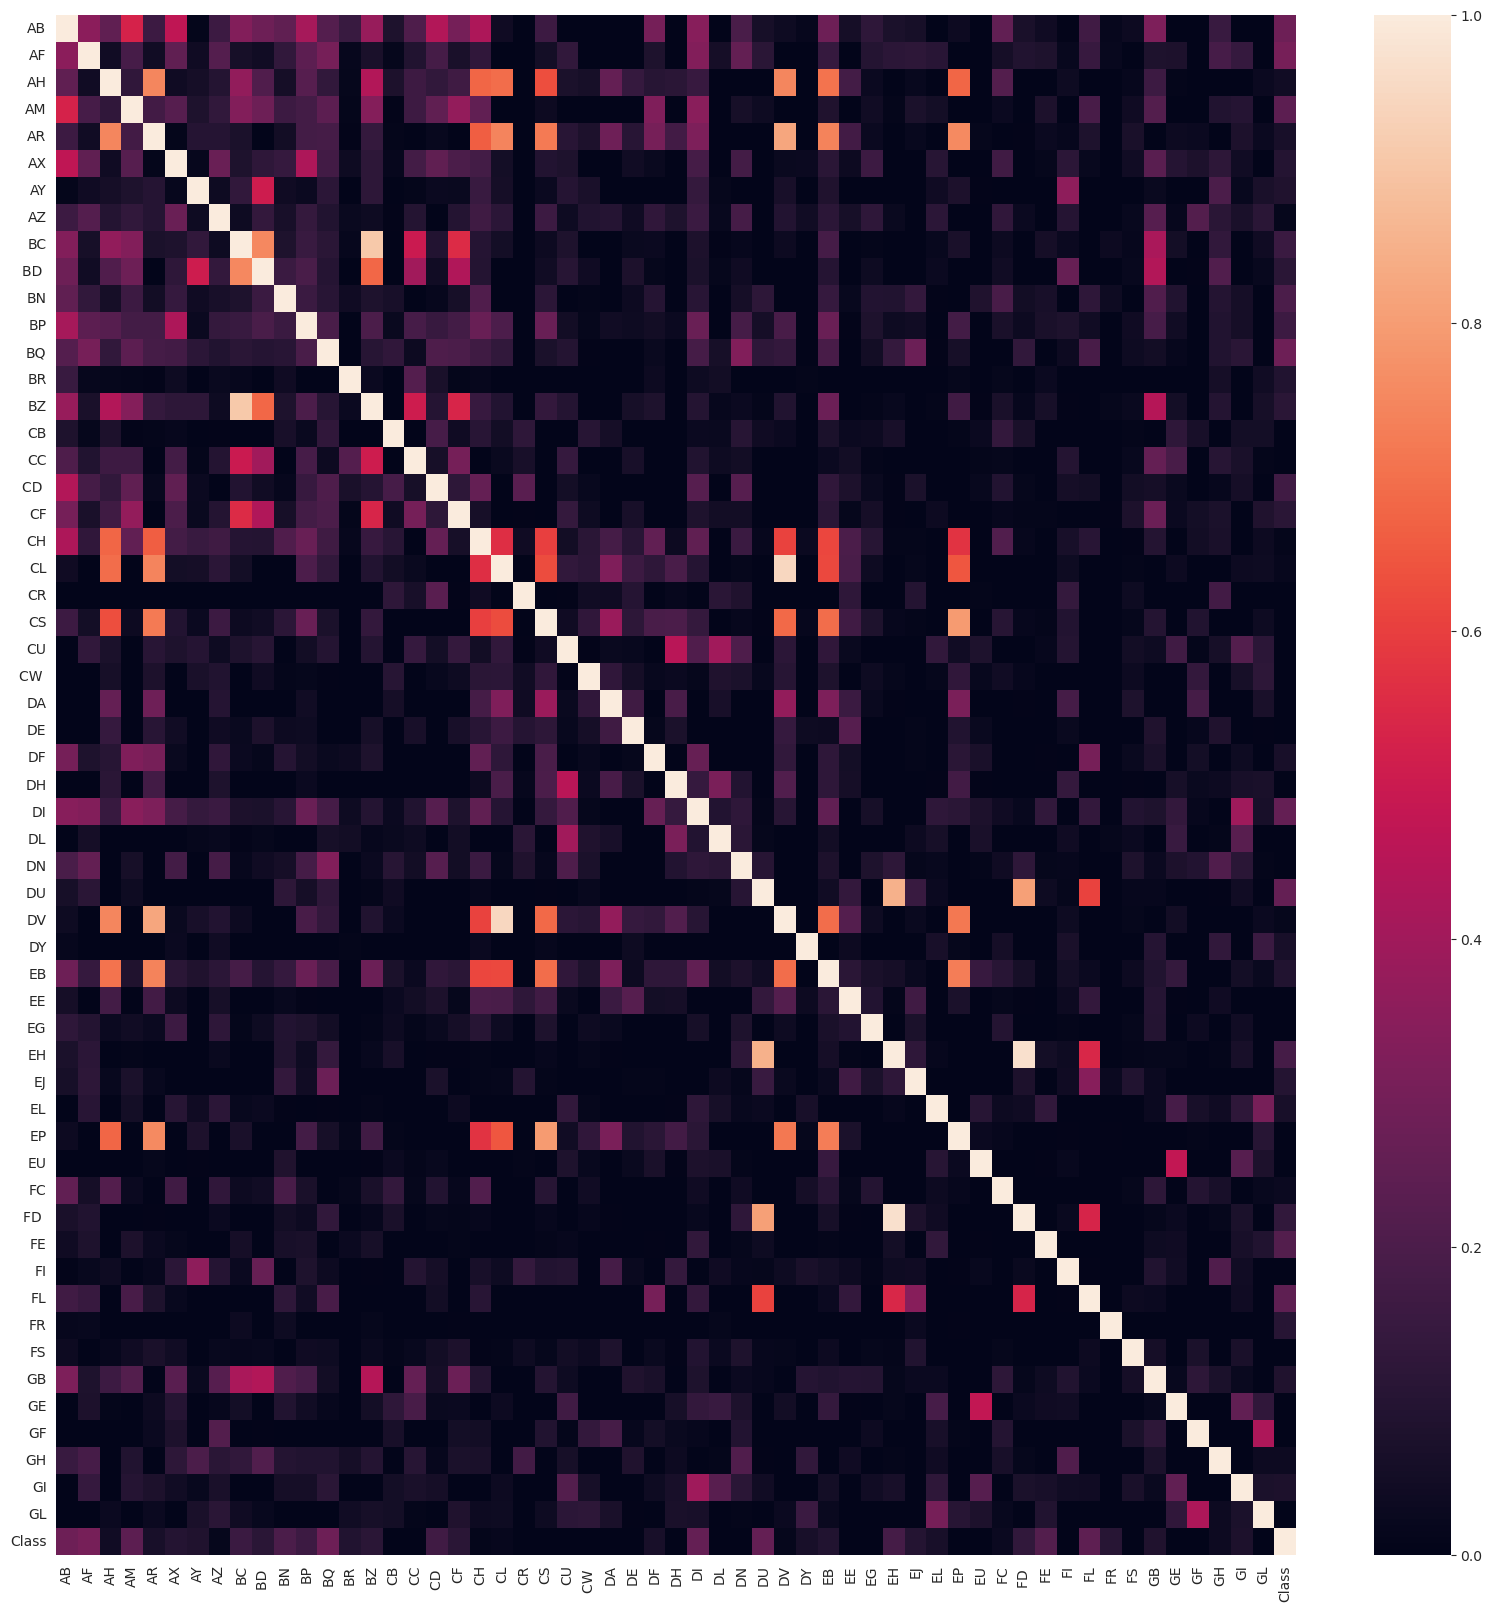

In [11]:
features = [i for i in train_data.columns]
corr = train_data[features].corr(numeric_only=False)
plt.figure(figsize = (20,20))
sns.heatmap(corr, cmap = 'rocket', annot = False,vmin=0);
plt.show()

---

# Training Models

In [12]:
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
import optuna

In [13]:
cols = [i for i in train_data.columns if i!="Class"]
seed = np.random.seed(6)

X = train_data[cols]
y = train_data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=seed)

## 1. RandomForestClassifier

In [14]:
# def objective(trial):
#     params = {
#         "max_depth":trial.suggest_int('max_depth',3,10),
#         'n_estimators' : trial.suggest_int('n_estimators',100,2500),
#         "min_samples_split": trial.suggest_int('min_samples_split', 2,8),
#         "min_samples_leaf" : trial.suggest_int('min_samples_leaf', 1,5),
#         "max_features": trial.suggest_categorical("max_features",["sqrt", "log2", None]),}
#     rfmodel_optuna = RandomForestClassifier(**params,random_state=seed,criterion="log_loss")
#     rfmodel_optuna.fit(X,y)
#     cv = cross_val_score(rfmodel_optuna, X, y, cv = 4,scoring='neg_log_loss').mean()
#     return cv

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100,timeout=2400)

In [15]:
# HyperParamater tuning using optuna
params = {'max_depth': 9, 'n_estimators': 877, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None}

rfmodel = RandomForestClassifier(**params,random_state=seed,criterion="log_loss")
rfmodel.fit(X_train,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=9, max_features=None,
                       min_samples_split=3, n_estimators=877)

## 2. XGBClassifier

In [16]:
# def objective(trial):
#     params = {
#     'n_estimators' : trial.suggest_int('n_estimators',2000,3000),
#     'max_depth':  trial.suggest_int('max_depth',3,8),
#     'min_child_weight': trial.suggest_float('min_child_weight', 2,4),
#     "learning_rate" : trial.suggest_float('learning_rate',1e-4, 0.2),
#     'subsample': trial.suggest_float('subsample', 0.2, 1),
#     'gamma': trial.suggest_float("gamma", 1e-4, 1.0),
#     "colsample_bytree" : trial.suggest_float('colsample_bytree',0.2,1),
#     "colsample_bylevel" : trial.suggest_float('colsample_bylevel',0.2,1),
#     "colsample_bynode" : trial.suggest_float('colsample_bynode',0.2,1)}
#     xgbmodel_optuna = XGBClassifier(**params,random_state=seed,tree_method = "gpu_hist",eval_metric="logloss")
#     xgbmodel_optuna.fit(X,y)
#     cv = cross_val_score(xgbmodel_optuna, X, y, cv = 4,scoring='neg_log_loss').mean()
#     return cv

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100,timeout=1200)

In [17]:
# HyperParamater tuning using optuna
params={'n_estimators': 2884, 
        'max_depth': 5, 
        'min_child_weight': 2.934487833919741,
        'learning_rate': 0.11341944575807082, 
        'subsample': 0.9045063514419968,
        'gamma': 0.4329153382843715,
        'colsample_bytree': 0.38872702868412506,
        'colsample_bylevel': 0.8321880031718571,
        'colsample_bynode': 0.802355707802605
       }

xgbmodel = XGBClassifier(**params,random_state=seed,eval_metric="logloss")
xgbmodel.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8321880031718571,
              colsample_bynode=0.802355707802605,
              colsample_bytree=0.38872702868412506, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.4329153382843715, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.11341944575807082,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2.934487833919741, missing=nan,
              monotone_constraints=None, n_estimators=2884, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

## 3. LGBMClassifier

In [18]:
# def objective(trial):
#     params = {
#         "num_leaves": trial.suggest_int('n_estimators',20,100),
#         "max_depth":trial.suggest_int('max_depth',3,10),
#         "learning_rate" : trial.suggest_float('learning_rate',1e-4, 0.2),
#         'n_estimators' : trial.suggest_int('n_estimators',100,2500),
#         "min_child_weight" : trial.suggest_float('min_child_weight', 0.5,4),
#         "min_child_samples" : trial.suggest_int('min_child_samples',10,50),
#         "subsample" : trial.suggest_float('subsample', 0.2, 1),
#         "subsample_freq" : trial.suggest_int('subsample_freq',0,5),
#         "colsample_bytree" : trial.suggest_float('colsample_bytree',0.2,1)}
#     lgbmmodel_optuna = LGBMClassifier(**params,random_state=seed,device="gpu")
#     lgbmmodel_optuna.fit(X,y)
#     cv = cross_val_score(lgbmmodel_optuna, X, y, cv = 4,scoring='neg_log_loss').mean()
#     return cv

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100,timeout=1200)

In [19]:
# HyperParamater tuning using optuna
params={
    'n_estimators': 91, 
    'max_depth': 10, 
    'learning_rate': 0.14644900801287575, 
    'min_child_weight': 3.3909127244994792, 
    'min_child_samples': 48, 
    'subsample': 0.7432022782421412,
    'subsample_freq': 1,
    'colsample_bytree': 0.6522591366402789
}

lgbmmodel = LGBMClassifier(**params,random_state=seed,device="gpu")
lgbmmodel.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.6522591366402789, device='gpu',
               learning_rate=0.14644900801287575, max_depth=10,
               min_child_samples=48, min_child_weight=3.3909127244994792,
               n_estimators=91, subsample=0.7432022782421412, subsample_freq=1)

---

# Ensembling XGB, LGBM using *Voting Classifier*

In [23]:
wts = [random.uniform(0.8,1) for i in range(2)]
wts.extend([random.uniform(0.4,0.7) for i in range(1)])
print(wts)

[0.8883505594738959, 0.8069327856705298, 0.4492087769989905]


In [24]:
# vcmodel = VotingClassifier([("lgbm",lgbmmodel),("xgb",xgbmodel),("gb",gbmodel),("rf",rfmodel)],voting="soft",weights=wts)
vcmodel = VotingClassifier([("lgbm",lgbmmodel),("xgb",xgbmodel),("rf",rfmodel)],voting="soft",weights=wts)
vcmodel.fit(X_train,y_train)

VotingClassifier(estimators=[('lgbm',
                              LGBMClassifier(colsample_bytree=0.6522591366402789,
                                             device='gpu',
                                             learning_rate=0.14644900801287575,
                                             max_depth=10, min_child_samples=48,
                                             min_child_weight=3.3909127244994792,
                                             n_estimators=91,
                                             subsample=0.7432022782421412,
                                             subsample_freq=1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_byleve...
                                            min_child_weight=2.934487833919741,
                                            missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=2884, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('rf',
                              RandomForestClassifier(criterion='log_loss',
                                                     max_depth=9,
                                                     max_features=None,
                                                     min_samples_split=3,
                                                     n_estimators=877))],
                 voting='soft',
                 weights=[0.8883505594738959, 0.8069327856705298,
                          0.4492087769989905])

---
# Evaluating Models

In [25]:
print("-"*100)
print("Accuracy of RF:",accuracy_score(y_test,rfmodel.predict(X_test)))
print("ROC AUC of RF:",roc_auc_score(y_test,rfmodel.predict_proba(X_test)[:,1]))
print("Cross Val Loss:",-1*np.mean(cross_val_score(rfmodel,X,y,cv=5,scoring='neg_log_loss')))

----------------------------------------------------------------------------------------------------
Accuracy of RF: 0.8790322580645161
ROC AUC of RF: 0.9411764705882354
Cross Val Loss: 0.2271534030572107


In [26]:
print("-"*100)
print("Accuracy of LGBM:",accuracy_score(y_test,lgbmmodel.predict(X_test)))
print("ROC AUC of LGBM:",roc_auc_score(y_test,lgbmmodel.predict_proba(X_test)[:,1]))
print("Cross Val Loss:",-1*np.mean(cross_val_score(lgbmmodel,X,y,cv=5,scoring='neg_log_loss')))

----------------------------------------------------------------------------------------------------
Accuracy of LGBM: 0.9032258064516129
ROC AUC of LGBM: 0.9674688057040998
Cross Val Loss: 0.18836709462211754


In [27]:
print("-"*100)
print("Accuracy of XGB:",accuracy_score(y_test,xgbmodel.predict(X_test)))
print("ROC AUC of XGB:",roc_auc_score(y_test,xgbmodel.predict_proba(X_test)[:,1]))
print("Cross Val Loss:",-1*np.mean(cross_val_score(xgbmodel,X,y,cv=5,scoring='neg_log_loss')))

----------------------------------------------------------------------------------------------------
Accuracy of XGB: 0.9112903225806451
ROC AUC of XGB: 0.9652406417112299
Cross Val Loss: 0.19163396217477013


----------------------------------------------------------------------------------------------------
Accuracy of VC: 0.9112903225806451
ROC AUC of VC: 0.9674688057040998
Cross Val Loss: 0.18260832342900893


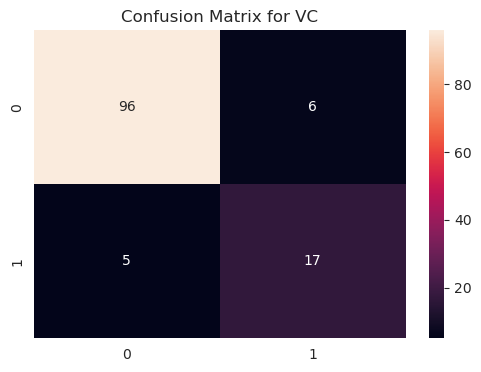

In [28]:
print("-"*100)
print("Accuracy of VC:",accuracy_score(y_test,vcmodel.predict(X_test)))
print("ROC AUC of VC:",roc_auc_score(y_test,vcmodel.predict_proba(X_test)[:,1]))
print("Cross Val Loss:",-1*np.mean(cross_val_score(vcmodel,X,y,cv=5,scoring='neg_log_loss')))

cnf_matrix = confusion_matrix(y_test,vcmodel.predict(X_test))
plt.figure(figsize=(6,4))
sns.heatmap(cnf_matrix,annot=True);
plt.title("Confusion Matrix for VC");

---
# Creating 'submission.csv'

In [ ]:
vcmodel.fit(X,y)
preds = vcmodel.predict_proba(test_data)

In [ ]:
submission = pd.DataFrame()
submission["Id"] = test_data.index

submission["class_0"] = preds[:,0]
submission["class_1"] = preds[:,1]

In [ ]:
submission.head()

In [ ]:
submission.to_csv("submission.csv",header=True,index=False)